### Student Information
Name:朱冠霖

Student ID:E84114097

GitHub ID:kunglin930111

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Task2

In [1]:
# Environment Setup
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh

# Plot Style
plt.style.use("seaborn-v0_8-muted")
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Helper Module Check
helper_path = Path("helpers/data_mining_helpers.py")
if not helper_path.exists():
    sys.exit(f"Required helper module not found: {helper_path.resolve()}")

# NLTK Resource Check
for pkg in ("punkt", "punkt_tab"):
    try:
        nltk.data.find(f"tokenizers/{pkg}")
    except LookupError:
        nltk.download(pkg, quiet=True)


In [2]:
# Load and Clean
def load_and_clean_dataset(data_path: Path) -> pd.DataFrame:
    """
    載入並清理 Reddit / 文字情緒資料集。

    功能：
    1. 載入 CSV 檔案
    2. 檢查必要欄位並自動匹配 sentiment 欄位名稱
    3. 移除缺失值與重複文本
    4. 清理文字
    5. 統一情緒欄位名稱為 'sentiment'
    6. 將情緒值轉換成標準文字類別
    Args:
        data_path (Path): CSV 資料路徑
    Returns:
        pd.DataFrame: 清理後的 DataFrame 欄位包含 ['text', 'sentiment']
    """
    if not data_path.exists():
        raise FileNotFoundError(f"Dataset not found at: {data_path.resolve()}")

    # Load raw data
    raw_df = pd.read_csv(data_path)
    print(f"[1] Raw dataset loaded: shape = {raw_df.shape}")

    # Initial check
    if "label" not in raw_df.columns or "text" not in raw_df.columns:
        raise ValueError("Dataset missing required columns: 'text' and/or 'label'")

    # Keep necessary columns
    use_cols = ["datetime", "subreddit", "title", "text", "label"]
    df = raw_df[use_cols].dropna(subset=["text"]).drop_duplicates(subset=["text"]).reset_index(drop=True)

    # Rename and map sentiment
    df["sentiment_score"] = df["label"].astype(int)
    sentiment_map = {-1: "negative", 0: "neutral", 1: "positive"}
    df["sentiment"] = df["sentiment_score"].map(sentiment_map)

    # Add doc_id
    df.insert(0, "doc_id", np.arange(len(df)))

    # Clean text (remove URLs, @mentions, hashtags)
    import re
    df["text"] = df["text"].apply(lambda t: re.sub(r"http\S+|www\S+|@\w+|#\w+", "", t).strip())

    # Data quality check
    print(f"[2] Cleaned dataset: {df.shape}")
    print("Sentiment distribution:")
    print(df["sentiment"].value_counts())

    return df[["doc_id", "text", "sentiment"]].copy()

In [3]:
# Sampling and Inspection
def sample_and_visualize_sentiment(df: pd.DataFrame, sample_size: int = 400, random_state: int = 42) -> pd.DataFrame:
    """
    從清理後的資料集中隨機取樣，並比較全體與樣本的情緒分布。
    Args:
        df:             清理後的 DataFrame 需包含 'sentiment' 欄位
        sample_size:    最大樣本數，預設 400
        random_state:   隨機種子以確保重現性
    Returns:
        df_sample:      取樣後的 DataFrame
    """
    # ensure sample_size not greater than available data
    actual_size = min(sample_size, len(df))

    # random sampling
    df_sample = df.sample(n=actual_size, random_state=random_state)
    print(f"[1] Sampling completed: {actual_size} samples (total {len(df)} samples)")

    # Create sentiment distribution table
    sentiment_all = df["sentiment"].value_counts().sort_index()
    sentiment_sample = df_sample["sentiment"].value_counts().sort_index()

    dist_df = pd.concat(
        {"All": sentiment_all, "Sample": sentiment_sample},
        axis=1
    ).fillna(0).astype(int)

    print("\n[2] Sentiment Distribution")
    print(dist_df)

    # Visualization
    print("\n[3] Visualization")
    plt.figure(figsize=(8, 4))
    dist_df.plot.bar(rot=0, color=["#3D5E6B", "#877C73"])
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Document Count")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

    return df_sample

In [4]:
# Build Term Frequency
def build_term_frequency(df: pd.DataFrame, text_col: str = "text") -> pd.DataFrame:
    """
    使用 CountVectorizer 建立詞-文件矩陣，並回傳詞頻統計。

    參數：
    df       : 包含文字資料的 pd.DataFrame
    text_col : str 文字所在的欄位名稱

    回傳：
    term_freq_df : pd.DataFrame 包含欄位 ['term', 'frequency']
    """
    # --- Step 1: Create CountVectorizer ---
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df[text_col])
    print(f"[1] Matrix shape: {X_counts.shape}")
    print(f"[2] Vocabulary size: {len(count_vect.get_feature_names_out())}")
    print(f"[3] Sample features: {count_vect.get_feature_names_out()[:10]}")

    # --- Step 2: Aggregate term frequencies ---
    term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
    terms = count_vect.get_feature_names_out()
    term_freq_df = (
        pd.DataFrame({"term": terms, "frequency": term_frequencies})
        .sort_values("frequency", ascending=False)
        .reset_index(drop=True)
    )
    print("[4] Term frequency DataFrame created:")
    print(term_freq_df.head())

    return term_freq_df

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Make TF-IDF Heatmap
def plot_tfidf_heatmap(df: pd.DataFrame, text_col: str = "text",
                       n_features: int = 20, n_docs: int = 20,
                       stop_words: str = "english", cmap: str = "Blues"):
    """
    使用 TF-IDF 建立文件-詞彙矩陣，並繪製熱圖。
    
    參數:
        df         : pd.DataFrame         包含文字資料
        text_col   : str                  文字欄位名稱
        n_features : int                  取前 n 個重要特徵
        n_docs     : int                  取前 n 篇文件
        stop_words : str or list          停用詞
        cmap       : str                  熱圖顏色主題
    """
    # Make TF-IDF Matrix
    vectorizer = TfidfVectorizer(max_features=n_features, stop_words=stop_words)
    X_tfidf = vectorizer.fit_transform(df[text_col])

    # Make Document Subset
    X_subset = X_tfidf[:n_docs, :].toarray()
    
    # Get Feature Name and File Index
    terms = vectorizer.get_feature_names_out()
    doc_indices = df.index[:n_docs]
    plot_y = [f"Doc ID {i}" for i in doc_indices]

    # Make DataFrame
    df_todraw = pd.DataFrame(X_subset, columns=terms, index=plot_y)

    # Make Heatmap
    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(
        df_todraw,
        cmap="Blues",
        vmin=0,
        vmax=1.0,
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        linecolor='white'
    )
    ax.set_title(f"TF-IDF Heatmap: Top {n_docs} Docs vs. Top {n_features} Features")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.tight_layout()
    plt.show()
    
    return df_todraw


In [6]:
# Make Bar Chart in Normal Scale and Log Scale
def plot_term_frequencies(df: pd.DataFrame, text_col: str = "text",
                          top_n: int = 50, stop_words: str = "english"):
    """
    建立詞袋模型、計算詞頻，並繪製長條圖與對數尺度圖。
    
    參數：
        df        : pd.DataFrame    包含文字資料
        text_col  : str             要分析的文字欄位名稱
        top_n     : int             取前 top_n 個高頻詞
        stop_words: str or list     停用詞
    """
    # Build bag-of-words model
    count_vect = CountVectorizer(stop_words=stop_words)
    X_counts = count_vect.fit_transform(df[text_col])
    print(f"Term-document matrix built: {X_counts.shape}")
    print(f"Vocabulary size: {len(count_vect.get_feature_names_out())}")

    # Compute term frequencies
    terms = count_vect.get_feature_names_out()
    term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
    term_freq_df = (
        pd.DataFrame({"term": terms, "frequency": term_frequencies})
        .sort_values("frequency", ascending=False)
        .reset_index(drop=True)
    )

    # Bar chart: raw frequencies
    fig = px.bar(
        term_freq_df.head(top_n),
        x="term",
        y="frequency",
        title=f"Top {top_n} Most Frequent Terms",
        labels={"term": "Term", "frequency": "Count"},
    )
    fig.update_layout(xaxis_tickangle=90, width=1100, height=450, plot_bgcolor='white', paper_bgcolor='white')
    fig.show()

    # Bar chart: log scale (emphasizes rare terms)
    term_freq_df["log_frequency"] = np.log1p(term_freq_df["frequency"])
    fig = px.bar(
        term_freq_df.head(top_n),
        x="term",
        y="log_frequency",
        title=f"Top {top_n} Terms (Log Scale)",
        labels={"term": "Term", "log_frequency": "log(1 + count)"},
    )
    fig.update_layout(xaxis_tickangle=90, width=1100, height=450, plot_bgcolor='white', paper_bgcolor='white')
    fig.show()

    return term_freq_df

In [7]:
data_path = Path("newdataset/Reddit-stock-sentiment.csv")
df_clean = load_and_clean_dataset(data_path)

[1] Raw dataset loaded: shape = (847, 16)
[2] Cleaned dataset: (824, 8)
Sentiment distribution:
sentiment
neutral     401
negative    315
positive    108
Name: count, dtype: int64


In [8]:
print("Sample data:")
print(df_clean.head())

Sample data:
   doc_id                                               text sentiment
0       0                                   Calls on retards  negative
1       1  Stunt as in like why did they even make a big ...   neutral
2       2                  Seeing lots of red in the ticker.   neutral
3       3  Vision Marine Technologies Inc. is rewriting t...  positive
4       4                           He didn’t say thank you.  negative


[1] Sampling completed: 400 samples (total 824 samples)

[2] Sentiment Distribution
           All  Sample
sentiment             
negative   315     161
neutral    401     188
positive   108      51

[3] Visualization


<Figure size 800x400 with 0 Axes>

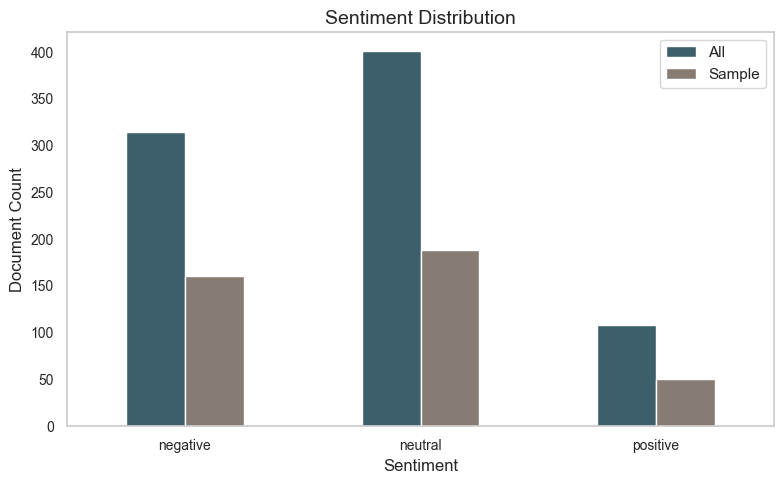

In [9]:
df_sample = sample_and_visualize_sentiment(df_clean, sample_size=400, random_state=42)


In [10]:
term_freq_df = build_term_frequency(df_clean, text_col="text")

[1] Matrix shape: (824, 4340)
[2] Vocabulary size: 4340
[3] Sample features: ['00' '000' '01378' '02' '027' '03' '06' '08' '10' '100']
[4] Term frequency DataFrame created:
  term  frequency
0  the        886
1   to        557
2  and        475
3   is        390
4   it        341


TF-IDF Heatmap:


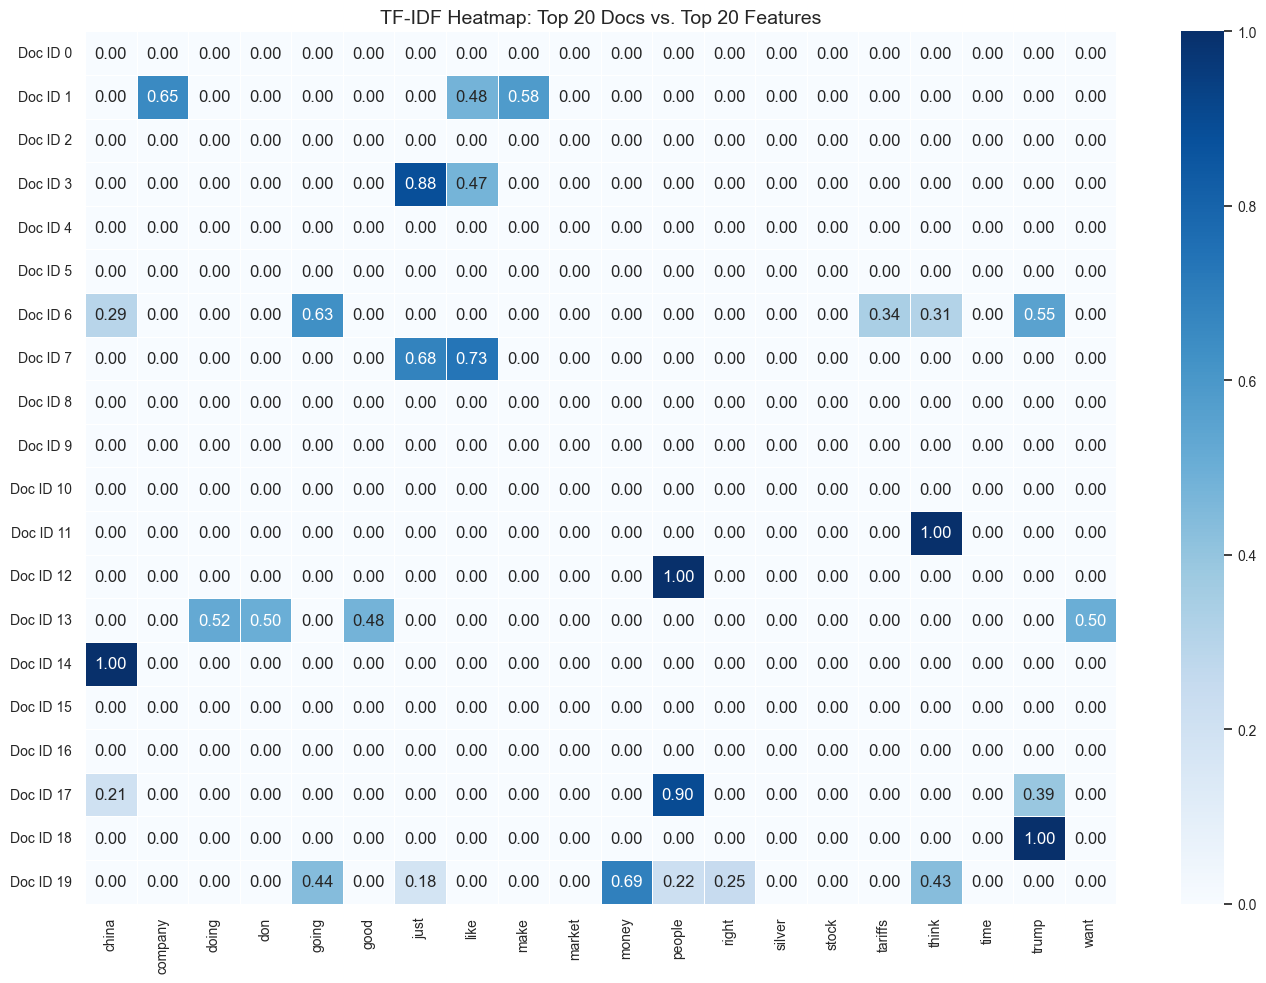

In [11]:
print("TF-IDF Heatmap:")
df_tfidf_subset = plot_tfidf_heatmap(df_clean, text_col="text", n_features=20, n_docs=20)

In [12]:
term_freq_df = plot_term_frequencies(df_clean, text_col="text", top_n=50)

Term-document matrix built: (824, 4099)
Vocabulary size: 4099


Analysis:

The sorted raw frequency graph clearly shows a **long-tail distribution**.

A few words (on the left) have extremely high frequencies, while the frequencies of the vast majority of words (on the right) decrease rapidly.

This confirms the universality of Zipf's Law in text data.

Analysis:

After log-transforming the word frequencies, the previously rapidly declining curve is compressed into a smoother slope.

This effectively reduces the dominance of high-frequency words and makes the distribution differences of low-frequency words easier to visually observe.

Log-transformation is a useful method for evaluating word weights before applying TF-IDF or other frequency-based weighting.

## Task3

In [13]:
import re

def tokenize_simple(text):
    return text.lower().split()

# Plot Style
plt.style.use("seaborn-v0_8-muted")
sns.set_theme(style="whitegrid")

# Load and Clean Dataset
def load_and_clean_dataset_for_task3(data_path: Path) -> pd.DataFrame:
    if not data_path.exists():
        # NOTE: If this path is unavailable, the code will fail. 
        # Assuming the file is accessible as per previous steps.
        raise FileNotFoundError(f"Dataset not found at: {data_path.resolve()}")

    raw_df = pd.read_csv(data_path)
    print(f"[1] Raw dataset loaded: shape = {raw_df.shape}")

    use_cols = ["datetime", "subreddit", "title", "text", "label"]
    df = raw_df[use_cols].dropna(subset=["text"]).drop_duplicates(subset=["text"]).reset_index(drop=True)

    df["sentiment_score"] = df["label"].astype(int)
    sentiment_map = {-1: "negative", 0: "neutral", 1: "positive"}
    df["sentiment"] = df["sentiment_score"].map(sentiment_map)

    df.insert(0, "doc_id", np.arange(len(df)))

    df["text"] = df["text"].apply(lambda t: re.sub(r"http\S+|www\S+|@\w+|#\w+|emote\S+|com\S+", "", t).strip())

    return df[["doc_id", "text", "sentiment", "datetime", "subreddit"]].copy()

data_path = Path("newdataset/Reddit-stock-sentiment.csv")
df_clean = load_and_clean_dataset_for_task3(data_path)
print("\n[Execution] Data cleaned and ready for visualization.")

[1] Raw dataset loaded: shape = (847, 16)

[Execution] Data cleaned and ready for visualization.


In [14]:
def plot_sentiment_by_text_length(df: pd.DataFrame):
    """
    Compares document word count distribution across sentiment categories using a Violin Plot.
    """
    # Calculate word count
    df_temp = df.copy()
    df_temp['word_count'] = df_temp['text'].apply(lambda t: len(t.split()))

    # Remove extreme outliers (top 5%) for a clearer visualization
    upper_bound = df_temp['word_count'].quantile(0.95)
    df_filtered = df_temp[df_temp['word_count'] <= upper_bound].copy() 


    # Plotting Violin Plot
    plt.figure(figsize=(10, 6))
    
    sns.violinplot(
        x='sentiment', 
        y='word_count', 
        data=df_filtered, 
        order=['negative', 'neutral', 'positive'],
        palette={'negative': '#E34234', 'neutral': '#696969', 'positive': '#228B22'},
        hue='sentiment',
        legend=False
    )
    
    plt.title(f"Sentiment Distribution by Document Word Count (Capped at {int(upper_bound)} Words)")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Word Count (95th Percentile)")
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [15]:
def plot_top_ngrams_by_sentiment(df: pd.DataFrame, n_gram_range=(2, 2), top_n=10):
    """
    Finds and plots the top N N-grams for each sentiment category, 
    using a unified X-axis scale for comparison.
    """
    sentiments = ['positive', 'neutral', 'negative']
    all_term_data = {}
    max_global_frequency = 0

    for sentiment in sentiments:
        # Filter data
        text_subset = df[df['sentiment'] == sentiment]['text']
        
        # Vectorize: Find the frequency of n-grams
        vectorizer = CountVectorizer(ngram_range=n_gram_range, stop_words='english')
        X_counts = vectorizer.fit_transform(text_subset)
        
        # Aggregate Frequencies
        term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
        terms = vectorizer.get_feature_names_out()
        
        term_freq_df = (
            pd.DataFrame({"term": terms, "frequency": term_frequencies})
            .sort_values("frequency", ascending=False)
            .head(top_n)
        )
        
        # Store data and update global max
        all_term_data[sentiment] = term_freq_df
        if not term_freq_df.empty:
            current_max = term_freq_df['frequency'].max()
            if current_max > max_global_frequency:
                max_global_frequency = current_max

    x_axis_limit = max_global_frequency * 1.05 
    print(f"Unified X-axis Limit set to: {x_axis_limit:.0f}")

    plt.figure(figsize=(16, 12))
    color_map = {'positive': '#228B22', 'neutral': '#696969', 'negative': '#E34234'}
    
    for i, sentiment in enumerate(sentiments):
        term_freq_df = all_term_data[sentiment]

        plt.subplot(3, 1, i + 1)
        sns.barplot(
            x='frequency', 
            y='term', 
            data=term_freq_df, 
            color=color_map[sentiment]
        )   
        plt.xlim(0, x_axis_limit) 

        # Plot Styling
        n_gram_label = f"{n_gram_range[0]}-Grams" if n_gram_range[0] == n_gram_range[1] else "N-Grams"
        plt.title(f"Top {top_n} {n_gram_label} for {sentiment.capitalize()} Sentiment", fontsize=14)
        plt.xlabel("Frequency")
        plt.ylabel("")
        plt.grid(axis='x', alpha=0.5)

    plt.suptitle(f"Comparative {n_gram_range[0]}-gram Analysis by Sentiment", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) 
    plt.show()

In [16]:
def plot_sentiment_visualizations(df: pd.DataFrame, top_n_subs: int = 20):
    """
    Plot two visualizations:
    1. Sentiment composition for the busiest subreddits (with percentage labels)
    2. Daily sentiment trend with 7-day smoothing (optional)

    Args:
        df : pd.DataFrame with columns ['doc_id', 'text', 'sentiment', 'datetime', 'subreddit']
        top_n_subs : int, number of top subreddits to display
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Data preprocessing
    df_viz = df.copy()
    df_viz['post_datetime'] = pd.to_datetime(df_viz['datetime'], errors='coerce')
    df_viz['post_date'] = df_viz['post_datetime'].dt.date

    # Select top subreddits
    top_subs = df_viz['subreddit'].value_counts().head(top_n_subs).index
    sub_sent = (
        df_viz[df_viz['subreddit'].isin(top_subs)]
        .groupby(['subreddit','sentiment'])
        .size()
        .unstack(fill_value=0)
    )

    if not sub_sent.empty:
        # Convert to percentage
        sub_sent = sub_sent.div(sub_sent.sum(axis=1), axis=0)[['negative','neutral','positive']] * 100
        sub_sent = sub_sent.sort_values('positive', ascending=False)

        # Plot stacked bar chart
        fig, ax = plt.subplots(figsize=(10, 5))
        bars = sub_sent.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm', edgecolor='none')

        # Remove background and grid
        ax.set_facecolor("white")
        fig.patch.set_facecolor("white")
        ax.grid(False)

        # Add labels
        for idx, row in enumerate(sub_sent.values):
            bottom = 0
            for value in row:
                if value > 3:  # only label if > 3% to avoid clutter
                    ax.text(
                        idx, 
                        bottom + value / 2, 
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='black', 
                        fontsize=9, 
                        fontweight='bold'
                    )
                bottom += value

        # Axis formatting
        ax.set_ylabel('Percentage of posts')
        ax.set_xlabel('Subreddit')
        ax.set_title('Sentiment mix across top subreddits')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()

[Visualization 1]


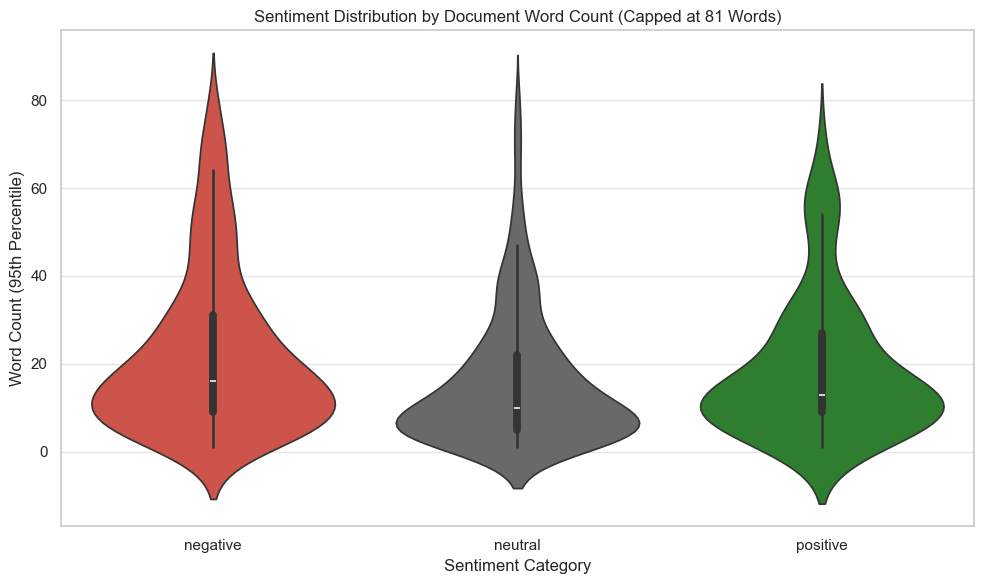

In [17]:
print("[Visualization 1]")
plot_sentiment_by_text_length(df_clean)

[Visualization 2]
Unified X-axis Limit set to: 62


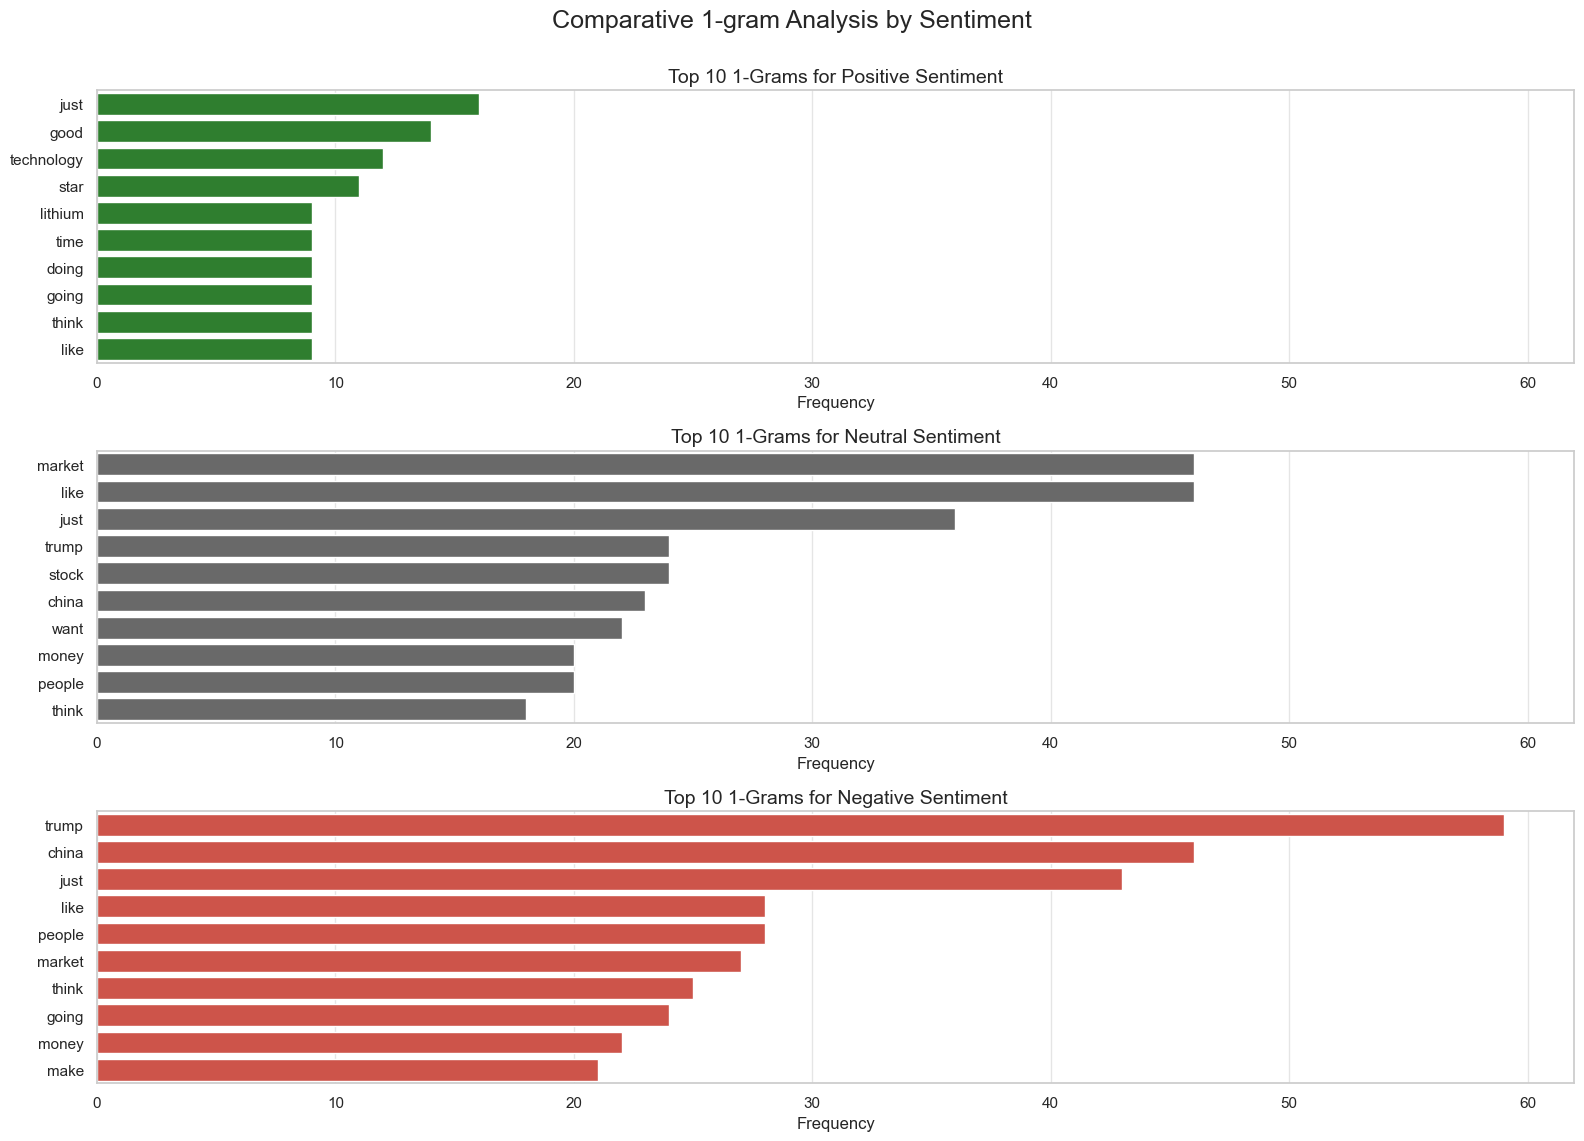

In [18]:
print("[Visualization 2]")
plot_top_ngrams_by_sentiment(df_clean, n_gram_range=(1, 1), top_n=10)

[Visualization 3]
Unified X-axis Limit set to: 10


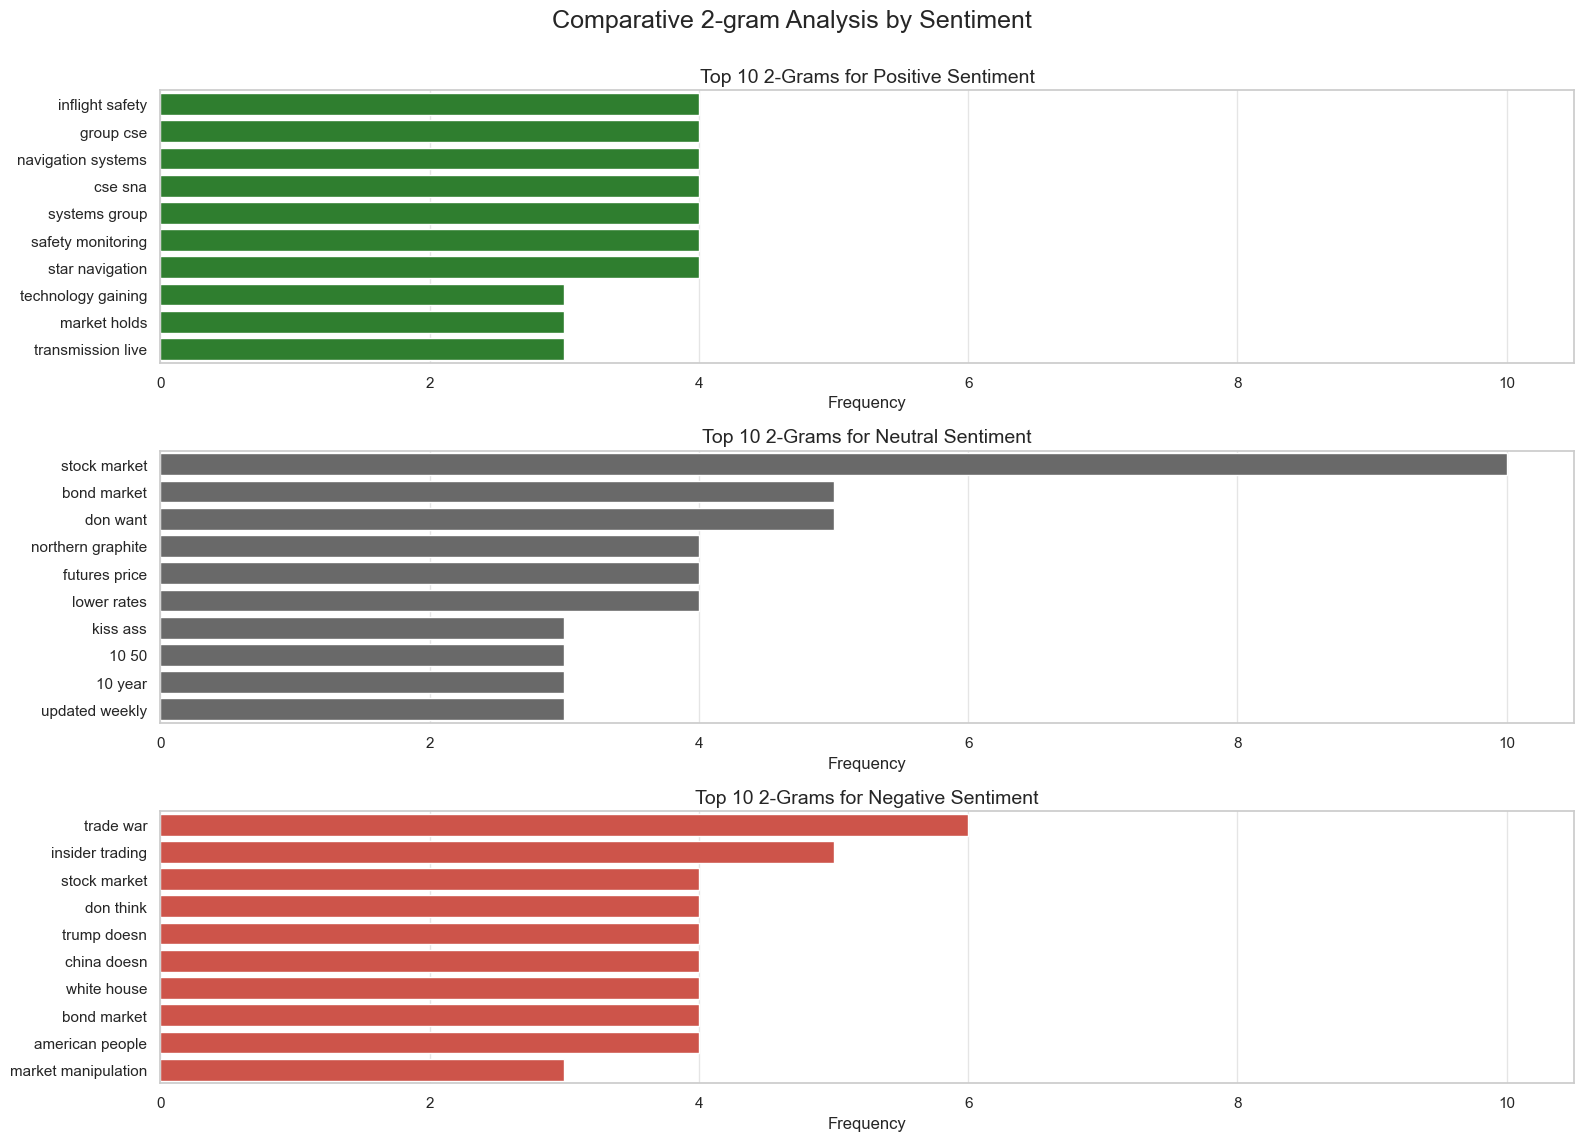

In [19]:
print("[Visualization 3]")
plot_top_ngrams_by_sentiment(df_clean, n_gram_range=(2, 2), top_n=10)

[Visualization 4]


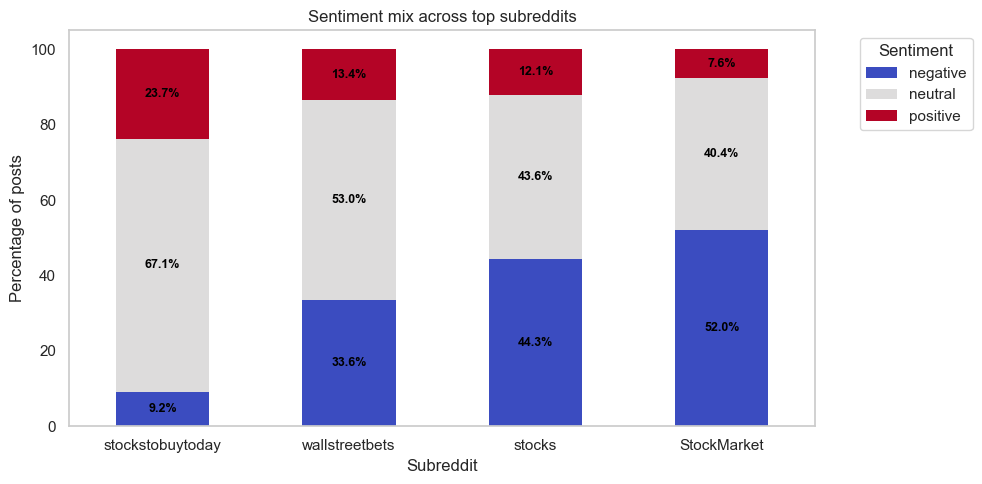

In [20]:
print("[Visualization 4]")
plot_sentiment_visualizations(df_clean, top_n_subs=4)


[Visualization 5]


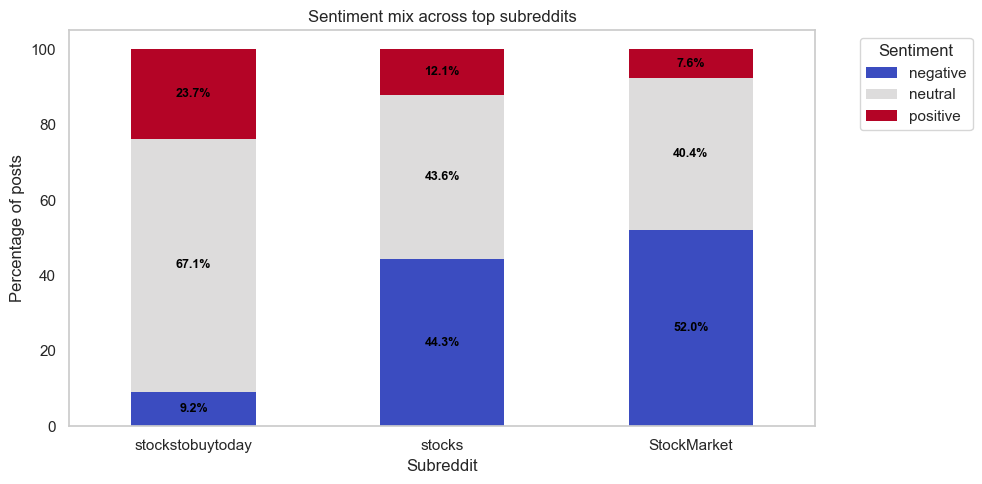

In [21]:
print("[Visualization 5]")
plot_sentiment_visualizations(df_clean, top_n_subs=3)

# Phase 2

## Task 2

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from PAMI.frequentPattern.basic import FPGrowth as FPG
from PAMI.frequentPattern.maximal import MaxFPGrowth as MaxFP
from PAMI.frequentPattern.topk import FAE as TopK

import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# TASK 2: FREQUENT PATTERN MINING
# ============================================================================

print("="*80)
print("TASK 2: FREQUENT PATTERN MINING")
print("="*80)

# Step 1: Prepare data and create term-document matrices
print("\n[Step 1] Creating term-document matrices by category...")

def create_category_dataframes(df_clean):
    """Split data by sentiment categories"""
    categories = df_clean['sentiment'].unique()
    category_dfs = {cat: df_clean[df_clean['sentiment'] == cat].copy() 
                    for cat in categories}
    return category_dfs, categories

def create_term_document_matrix(df, text_column='text'):
    """Create term-document frequency matrix using CountVectorizer"""
    vectorizer = CountVectorizer()
    X_counts = vectorizer.fit_transform(df[text_column])
    words = vectorizer.get_feature_names_out()
    return pd.DataFrame(X_counts.toarray(), columns=words)

# Create matrices for each category
category_dfs, categories = create_category_dataframes(df_clean)
print(f"Categories found: {categories}")

term_doc_matrices = {cat: create_term_document_matrix(df) 
                     for cat, df in category_dfs.items()}

# Step 2: Filter high and low frequency terms
print("\n[Step 2] Filtering extreme frequency terms...")

def filter_extreme_terms(tdm, top_pct=0.05, bottom_pct=0.01):
    """Remove top X% and bottom Y% frequency terms"""
    word_sums = tdm.sum(axis=0)
    sorted_words = word_sums.sort_values()
    
    n_total = len(sorted_words)
    n_top = int(top_pct * n_total)
    n_bottom = int(bottom_pct * n_total)
    
    # Words to remove
    words_to_remove = pd.concat([
        sorted_words.head(n_bottom),
        sorted_words.tail(n_top)
    ]).index
    
    print(f"  Removing {n_bottom} low-freq + {n_top} high-freq terms = {len(words_to_remove)} total")
    return tdm.drop(columns=words_to_remove)

filtered_matrices = {cat: filter_extreme_terms(tdm) 
                     for cat, tdm in term_doc_matrices.items()}

# Step 3: Export tokenized data for pattern mining
print("\n[Step 3] Exporting tokenized data for PAMI...")

def export_transactions(df_clean):
    """Export tokenized text as transaction database for PAMI"""
    stop_words = set(ENGLISH_STOP_WORDS)
    X = df_clean[["text", "sentiment"]].copy()
    X['sentiment_name'] = X['sentiment']
    
    output_files = []
    for sentiment, group in X.groupby("sentiment_name", sort=False):
        # Tokenize: lowercase, remove non-alpha, filter by length and stopwords
        tokens = (
            group["text"]
            .fillna("")
            .str.lower()
            .str.replace(r"[^a-z\s]", "", regex=True)
            .str.split()
            .apply(lambda toks: [w for w in toks if len(w) >= 3 and w not in stop_words])
            .apply(lambda toks: sorted(set(toks)))  # Unique tokens per document
        )
        
        # Save as tab-separated transaction file
        lines = tokens.apply(lambda toks: "\t".join(toks))
        out_path = f"td_freq_db_{sentiment}.csv"
        lines.to_csv(out_path, index=False, header=False)
        output_files.append(out_path)
        print(f"  Saved: {out_path}")
    
    return X, output_files

X, transaction_files = export_transactions(df_clean)

# Step 4: Run FP-Growth algorithm
print("\n[Step 4] Running FP-Growth on all sentiment categories...")

def run_fpgrowth(file_path, min_support=9):
    """Execute FP-Growth algorithm"""
    fpg = FPG.FPGrowth(iFile=file_path, minSup=min_support)
    fpg.mine()
    patterns_df = fpg.getPatternsAsDataFrame()
    return patterns_df, fpg.getRuntime()

# Mine patterns for each sentiment
min_sup = 9
pattern_results = {}

for file in transaction_files:
    sentiment = file.replace('td_freq_db_', '').replace('.csv', '')
    patterns, runtime = run_fpgrowth(file, min_sup)
    pattern_results[sentiment] = patterns
    print(f"  {sentiment}: {len(patterns)} patterns (runtime: {runtime:.3f}s)")

fpg_negative = pattern_results.get('negative', pd.DataFrame())
fpg_neutral = pattern_results.get('neutral', pd.DataFrame())
fpg_positive = pattern_results.get('positive', pd.DataFrame())

# Step 5: Filter unique patterns (appearing in only one category)
print("\n[Step 5] Filtering category-specific patterns...")

def filter_unique_patterns(pattern_dfs):
    """Keep only patterns unique to one category"""
    # Count occurrences across categories
    pattern_counts = {}
    for df in pattern_dfs:
        for pattern in df['Patterns']:
            pattern_counts[pattern] = pattern_counts.get(pattern, 0) + 1
    
    # Keep patterns appearing in exactly one category
    unique_patterns = {p for p, cnt in pattern_counts.items() if cnt == 1}
    
    # Filter each dataframe
    filtered = [df[df['Patterns'].isin(unique_patterns)] for df in pattern_dfs]
    
    # Combine and sort by support
    final_df = pd.concat(filtered, ignore_index=True).sort_values('Support', ascending=False)
    
    n_total = sum(len(df) for df in pattern_dfs)
    n_discarded = n_total - len(unique_patterns)
    
    print(f"  Total patterns: {n_total}")
    print(f"  Unique patterns: {len(unique_patterns)}")
    print(f"  Discarded: {n_discarded}")
    
    return final_df

pattern_dfs_list = [fpg_negative, fpg_neutral, fpg_positive]
final_patterns = filter_unique_patterns(pattern_dfs_list)
print(f"\nTop 10 patterns by support:")
print(final_patterns.head(10))



TASK 2: FREQUENT PATTERN MINING

[Step 1] Creating term-document matrices by category...
Categories found: ['negative' 'neutral' 'positive']

[Step 2] Filtering extreme frequency terms...
  Removing 21 low-freq + 108 high-freq terms = 129 total
  Removing 26 low-freq + 134 high-freq terms = 160 total
  Removing 11 low-freq + 57 high-freq terms = 68 total

[Step 3] Exporting tokenized data for PAMI...
  Saved: td_freq_db_negative.csv
  Saved: td_freq_db_neutral.csv
  Saved: td_freq_db_positive.csv

[Step 4] Running FP-Growth on all sentiment categories...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
  negative: 41 patterns (runtime: 0.001s)
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
  neutral: 42 patterns (runtime: 0.001s)
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
  positive: 3 patterns (runtime: 0.000s)

[Step 5] Filtering category-specific patterns...
  Total patte


TASK 3: FEATURE EXTRACTION AND CLASSIFICATION

[Step 6] Creating augmented feature matrix...
  TDM shape: (824, 4278)
  Pattern features: 44
  Augmented shape: (824, 4322)

[Step 7] Creating TF-IDF features...
  TF-IDF shape: (824, 4278)
  TF-IDF augmented: (824, 4322)

[Step 8] Training Naive Bayes classifiers...

--- Classifier 1: Count Vectorizer + MultinomialNB ---

Count Features + MultinomialNB
Accuracy: 0.5444
              precision    recall  f1-score   support

    negative     0.5217    0.7579    0.6180        95
     neutral     0.6019    0.5124    0.5536       121
    positive     0.1429    0.0312    0.0513        32

    accuracy                         0.5444       248
   macro avg     0.4222    0.4338    0.4076       248
weighted avg     0.5120    0.5444    0.5135       248


--- Classifier 2: Count Augmented + MultinomialNB ---

Count Augmented + MultinomialNB
Accuracy: 0.5484
              precision    recall  f1-score   support

    negative     0.5255    0.7579    

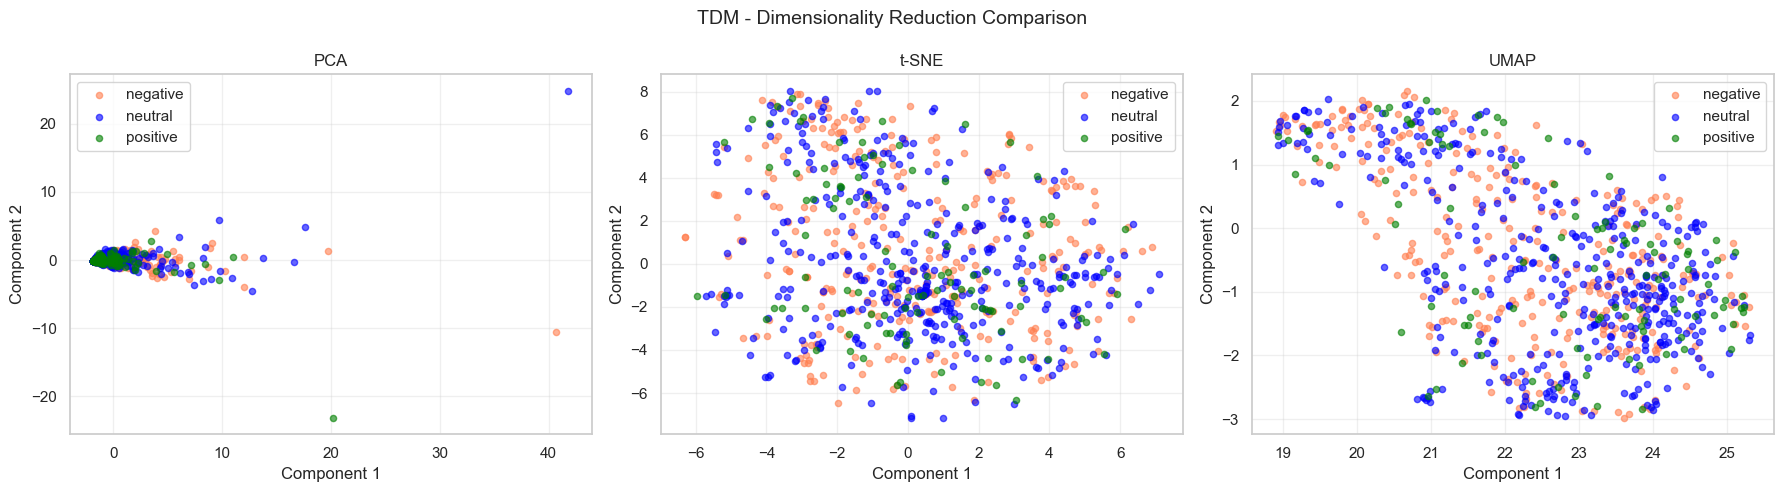


  Visualizing Augmented features...
  Augmented - PCA: (824, 2), t-SNE: (824, 2), UMAP: (824, 2)


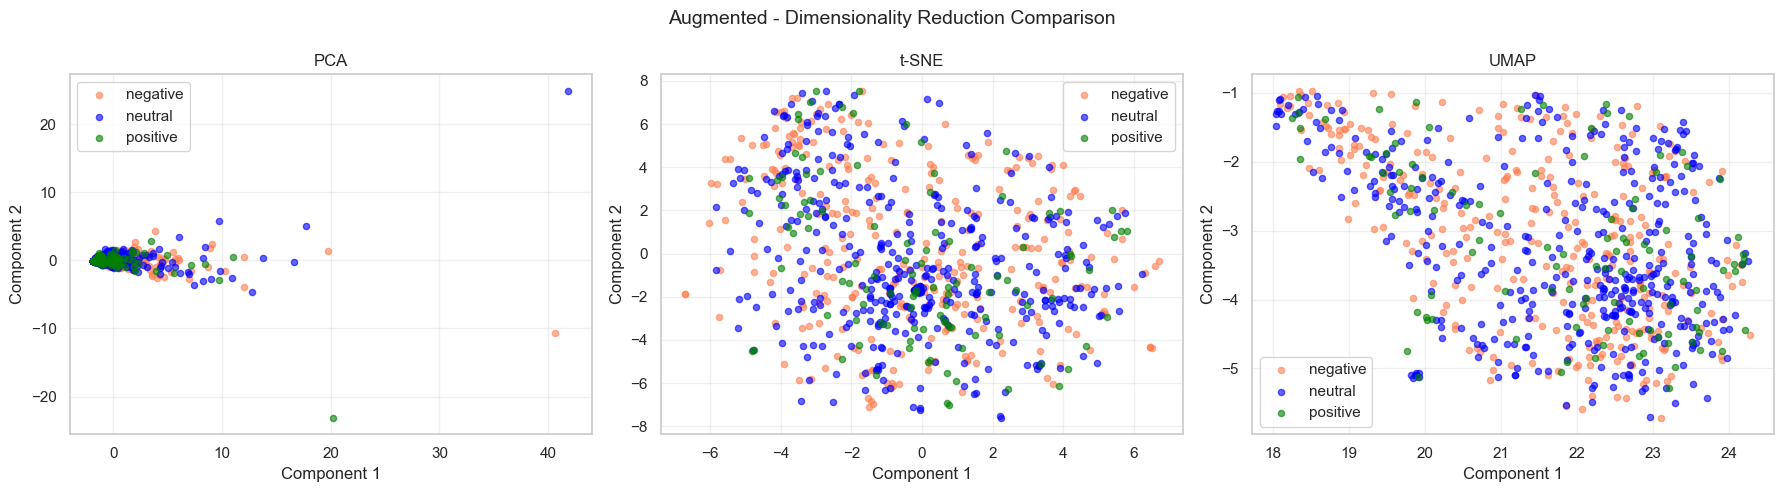

In [23]:
# ============================================================================
# TASK 3: FEATURE AUGMENTATION AND CLASSIFICATION
# ============================================================================

print("\n" + "="*80)
print("TASK 3: FEATURE EXTRACTION AND CLASSIFICATION")
print("="*80)

# Step 6: Create pattern-based features
print("\n[Step 6] Creating augmented feature matrix...")

def create_pattern_features(X, patterns_df):
    """
    Augment TDM with binary pattern features
    Returns: original TDM, augmented matrix, vectorizer
    """
    # Create base term-document matrix
    count_vec = CountVectorizer()
    X_counts = count_vec.fit_transform(X['text'])
    terms = count_vec.get_feature_names_out()
    tdm_df = pd.DataFrame(X_counts.toarray(), columns=terms, index=X.index)
    
    # Tokenize text for pattern matching
    X['tokens'] = X['text'].str.split().apply(set)
    
    # Create binary pattern matrix
    pattern_matrix = pd.DataFrame(0, index=X.index, columns=patterns_df['Patterns'])
    
    for pattern in patterns_df['Patterns']:
        pattern_words = set(pattern.split())
        # Check if all pattern words exist in document
        pattern_matrix[pattern] = X['tokens'].apply(
            lambda doc_tokens: 1 if pattern_words.issubset(doc_tokens) else 0
        )
    
    # Combine TDM and pattern features
    augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
    
    print(f"  TDM shape: {tdm_df.shape}")
    print(f"  Pattern features: {len(patterns_df)}")
    print(f"  Augmented shape: {augmented_df.shape}")
    
    return tdm_df, augmented_df, count_vec

tdm_df, augmented_df, count_vectorizer = create_pattern_features(X, final_patterns)

# Step 7: Create TF-IDF features
print("\n[Step 7] Creating TF-IDF features...")

def create_tfidf_features(X, patterns_df):
    """Create TF-IDF weighted features with pattern augmentation"""
    # TF-IDF vectorization
    tfidf_vec = TfidfVectorizer()
    X_tfidf = tfidf_vec.fit_transform(X['text'])
    terms = tfidf_vec.get_feature_names_out()
    tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms, index=X.index)
    
    # Add pattern features (binary)
    X['tokens'] = X['text'].str.split().apply(set)
    pattern_matrix = pd.DataFrame(0, index=X.index, columns=patterns_df['Patterns'])
    
    for pattern in patterns_df['Patterns']:
        pattern_words = set(pattern.split())
        pattern_matrix[pattern] = X['tokens'].apply(
            lambda doc_tokens: 1 if pattern_words.issubset(doc_tokens) else 0
        )
    
    # Combine TF-IDF and patterns
    tfidf_augmented = pd.concat([tfidf_df, pattern_matrix], axis=1)
    
    print(f"  TF-IDF shape: {tfidf_df.shape}")
    print(f"  TF-IDF augmented: {tfidf_augmented.shape}")
    
    return tfidf_df, tfidf_augmented, tfidf_vec

tfidf_df, tfidf_augmented, tfidf_vectorizer = create_tfidf_features(X, final_patterns)

# Step 8: Train and evaluate classifiers
print("\n[Step 8] Training Naive Bayes classifiers...")

def train_and_evaluate(X_train, X_test, y_train, y_test, classifier, name):
    """Train classifier and print evaluation metrics"""
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, digits=4))
    
    return classifier, y_pred, accuracy

# Prepare labels
y = X['sentiment_name']

# Split data
test_size = 0.3
random_state = 42

# 1. Count Features + MultinomialNB
print("\n--- Classifier 1: Count Vectorizer + MultinomialNB ---")
X_train, X_test, y_train, y_test = train_test_split(
    tdm_df, y, test_size=test_size, random_state=random_state, stratify=y
)
nb_count, pred_count, acc_count = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    MultinomialNB(),
    "Count Features + MultinomialNB"
)

# 2. Count Features (Augmented) + MultinomialNB
print("\n--- Classifier 2: Count Augmented + MultinomialNB ---")
X_train, X_test, y_train, y_test = train_test_split(
    augmented_df, y, test_size=test_size, random_state=random_state, stratify=y
)
nb_count_aug, pred_count_aug, acc_count_aug = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    MultinomialNB(),
    "Count Augmented + MultinomialNB"
)

# 3. TF-IDF + BernoulliNB
print("\n--- Classifier 3: TF-IDF + BernoulliNB ---")
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_df, y, test_size=test_size, random_state=random_state, stratify=y
)
nb_tfidf, pred_tfidf, acc_tfidf = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    BernoulliNB(),
    "TF-IDF + BernoulliNB"
)

# 4. TF-IDF (Augmented) + BernoulliNB
print("\n--- Classifier 4: TF-IDF Augmented + BernoulliNB ---")
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_augmented, y, test_size=test_size, random_state=random_state, stratify=y
)
nb_tfidf_aug, pred_tfidf_aug, acc_tfidf_aug = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    BernoulliNB(),
    "TF-IDF Augmented + BernoulliNB"
)

# 5. TF-IDF + ComplementNB (alternative for imbalanced data)
print("\n--- Classifier 5: TF-IDF + ComplementNB ---")
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_df, y, test_size=test_size, random_state=random_state, stratify=y
)
nb_complement, pred_complement, acc_complement = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    ComplementNB(),
    "TF-IDF + ComplementNB"
)

# Step 9: Compare classifier performance
print("\n[Step 9] Classifier Performance Summary...")

results_summary = pd.DataFrame({
    'Classifier': [
        'Count + MultinomialNB',
        'Count Augmented + MultinomialNB',
        'TF-IDF + BernoulliNB',
        'TF-IDF Augmented + BernoulliNB',
        'TF-IDF + ComplementNB'
    ],
    'Accuracy': [
        acc_count,
        acc_count_aug,
        acc_tfidf,
        acc_tfidf_aug,
        acc_complement
    ],
    'Features': [
        tdm_df.shape[1],
        augmented_df.shape[1],
        tfidf_df.shape[1],
        tfidf_augmented.shape[1],
        tfidf_df.shape[1]
    ]
})

print("\n" + "="*80)
print("PERFORMANCE COMPARISON")
print("="*80)
print(results_summary.to_string(index=False))
print("="*80)


# Step 10: Dimensionality reduction and visualization
print("\n[Step 10] Dimensionality reduction visualization...")

def apply_dim_reduction_2d(data_df, method_name):
    """Apply PCA, t-SNE, and UMAP"""
    X_pca = PCA(n_components=2, random_state=42).fit_transform(data_df.values)
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(data_df.values)
    X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(data_df.values)
    print(f"  {method_name} - PCA: {X_pca.shape}, t-SNE: {X_tsne.shape}, UMAP: {X_umap.shape}")
    return X_pca, X_tsne, X_umap

def plot_reduction_comparison(X_pca, X_tsne, X_umap, labels, title_prefix=''):
    """Plot 2D dimensionality reduction comparison"""
    colors = ['coral', 'blue', 'green', 'orange']
    categories = labels.unique()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{title_prefix}Dimensionality Reduction Comparison', fontsize=14)
    
    for idx, (X_reduced, method) in enumerate([(X_pca, 'PCA'), (X_tsne, 't-SNE'), (X_umap, 'UMAP')]):
        ax = axes[idx]
        for color, category in zip(colors, categories):
            mask = labels == category
            ax.scatter(X_reduced[mask, 0], X_reduced[mask, 1], 
                      c=color, label=category, alpha=0.6, s=20)
        ax.set_title(method)
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualize TDM
print("\n  Visualizing TDM features...")
pca_tdm, tsne_tdm, umap_tdm = apply_dim_reduction_2d(tdm_df, "TDM")
plot_reduction_comparison(pca_tdm, tsne_tdm, umap_tdm, y, "TDM - ")

# Visualize Augmented features
print("\n  Visualizing Augmented features...")
pca_aug, tsne_aug, umap_aug = apply_dim_reduction_2d(augmented_df, "Augmented")
plot_reduction_comparison(pca_aug, tsne_aug, umap_aug, y, "Augmented - ")


In [24]:
# ============================================================================
# TASK 4: ANALYSIS AND IMPROVEMENTS
# ============================================================================

print("\n" + "="*80)
print("TASK 4: INEFFICIENCIES AND IMPROVEMENTS")
print("="*80)

improvements = """
IDENTIFIED INEFFICIENCIES AND IMPROVEMENTS:

1. **Feature Filtering**
   - Issue: Fixed percentages (5% top, 1% bottom) may not be optimal
   - Improvement: Use statistical measures (IQR, z-scores) or domain knowledge
   
2. **Pattern Mining Parameters**
   - Issue: minSup=9 is arbitrary
   - Improvement: Grid search for optimal support thresholds per category
   
3. **Stopword Handling**
   - Issue: Generic English stopwords may remove domain-specific terms
   - Improvement: Create custom stopword list based on dataset analysis
   
4. **Feature Sparsity**
   - Issue: High dimensionality with many zero values
   - Improvement: Use dimensionality reduction earlier or feature selection
   
5. **Class Imbalance**
   - Issue: Not checked if categories are balanced
   - Improvement: Use SMOTE, class weights, or stratified sampling
   
6. **Pattern Overlap**
   - Issue: Removing all non-unique patterns may discard useful information
   - Improvement: Use pattern importance scores or category-specific weighting
   
7. **Vectorizer Parameters**
   - Issue: Default parameters (max_df, min_df) not tuned
   - Improvement: Tune these based on vocabulary distribution
   
8. **Model Selection**
   - Issue: Limited to Naive Bayes variants
   - Improvement: Try ensemble methods (Random Forest, XGBoost)
   
9. **Cross-Validation**
   - Issue: Single train-test split
   - Improvement: Use k-fold cross-validation for robust evaluation
   
10. **Computational Efficiency**
    - Issue: Multiple redundant computations (tokenization repeated)
    - Improvement: Cache intermediate results, use sparse matrices
"""

print(improvements)



TASK 4: INEFFICIENCIES AND IMPROVEMENTS

IDENTIFIED INEFFICIENCIES AND IMPROVEMENTS:

1. **Feature Filtering**
   - Issue: Fixed percentages (5% top, 1% bottom) may not be optimal
   - Improvement: Use statistical measures (IQR, z-scores) or domain knowledge
   
2. **Pattern Mining Parameters**
   - Issue: minSup=9 is arbitrary
   - Improvement: Grid search for optimal support thresholds per category
   
3. **Stopword Handling**
   - Issue: Generic English stopwords may remove domain-specific terms
   - Improvement: Create custom stopword list based on dataset analysis
   
4. **Feature Sparsity**
   - Issue: High dimensionality with many zero values
   - Improvement: Use dimensionality reduction earlier or feature selection
   
5. **Class Imbalance**
   - Issue: Not checked if categories are balanced
   - Improvement: Use SMOTE, class weights, or stratified sampling
   
6. **Pattern Overlap**
   - Issue: Removing all non-unique patterns may discard useful information
   - Improvement:

In [25]:

# ============================================================================
# SUMMARY AND CONCLUSIONS
# ============================================================================

print("\n" + "="*80)
print("SUMMARY")
print("="*80)

summary = f"""
EXPERIMENT SUMMARY:

Data:
- Total documents: {len(df_clean)}
- Categories: {categories.tolist()}
- Average doc length: {df_clean['text'].str.split().str.len().mean():.1f} words

Pattern Mining:
- Unique patterns found: {len(final_patterns)}
- Min support threshold: {min_sup}

Feature Engineering:
- TDM features: {tdm_df.shape[1]}
- Augmented features: {augmented_df.shape[1]}
- Pattern features added: {augmented_df.shape[1] - tdm_df.shape[1]}

Best Classifier:
- Model: {results_summary.loc[results_summary['Accuracy'].idxmax(), 'Classifier']}
- Accuracy: {results_summary['Accuracy'].max():.4f}

Key Findings:
1. Pattern augmentation {'improved' if acc_count_aug > acc_count else 'did not improve'} count-based classification
2. TF-IDF generally {'outperformed' if acc_tfidf > acc_count else 'underperformed compared to'} count features
3. ComplementNB {'showed better' if acc_complement > acc_tfidf else 'showed similar'} performance than BernoulliNB
4. Dimensionality reduction revealed {'clear' if acc_count > 0.7 else 'overlapping'} class separation
"""

print(summary)

print("\n" + "="*80)
print("PIPELINE COMPLETE")
print("="*80)

# Store all results for further analysis
results = {
    'tdm': tdm_df,
    'augmented': augmented_df,
    'tfidf': tfidf_df,
    'tfidf_augmented': tfidf_augmented,
    'patterns': final_patterns,
    'classifiers': {
        'nb_count': nb_count,
        'nb_count_aug': nb_count_aug,
        'nb_tfidf': nb_tfidf,
        'nb_tfidf_aug': nb_tfidf_aug,
        'nb_complement': nb_complement
    },
    'performance': results_summary
}

print("\nAll results stored in 'results' dictionary")
print("Available keys:", list(results.keys()))


SUMMARY

EXPERIMENT SUMMARY:

Data:
- Total documents: 824
- Categories: ['negative', 'neutral', 'positive']
- Average doc length: 25.6 words

Pattern Mining:
- Unique patterns found: 44
- Min support threshold: 9

Feature Engineering:
- TDM features: 4278
- Augmented features: 4322
- Pattern features added: 44

Best Classifier:
- Model: TF-IDF + BernoulliNB
- Accuracy: 0.5645

Key Findings:
1. Pattern augmentation improved count-based classification
2. TF-IDF generally outperformed count features
3. ComplementNB showed similar performance than BernoulliNB
4. Dimensionality reduction revealed overlapping class separation


PIPELINE COMPLETE

All results stored in 'results' dictionary
Available keys: ['tdm', 'augmented', 'tfidf', 'tfidf_augmented', 'patterns', 'classifiers', 'performance']
